<a href="https://colab.research.google.com/github/slothnojutsu/tripletreat/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final report: Trends and Success Factors for TV Shows
## 1 - Introduction
**Course**: Introduction to Data Science  
**Instructor**: Dr.Dogdu
**Team Members**:  
- Theresa Katele (tkatele@angelo.edu)  
- Aicha Ndir (andir@angelo.edu)  
- Seoyoung Jung (sysilove1526@gmail.com)  


**Date** : 12-10-2024

## 2 - Project Description

### Problem Statement
The goal of this project is to identify trends and success factors for TV shows, focusing on predicting popularity and audience engagement using regression, classification, and clustering techniques.

### Purpose
To leverage data science methodologies to derive insights into TV show performance and provide data-driven recommendations for future TV show success.

## 3 - Dataset

- **Source:** The Movie Database (TMDB)  
- **Features:**  
  - **Numerical Features:** Popularity, Vote Average, Vote Count  
  - **Categorical Features:** Name, First Air Date, Overview  
- **Dataset Size:** 4064 entries with 7 features / 1.38 MB
- **Link to Source:** https://www.kaggle.com/datasets/anujagrwl16/top-rated-movie-list-from-tmdb
- **Date Produced:** 09/2024


#### Importing the dataset and necessary librairies:

In [25]:
# Import essential libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    classification_report,
    accuracy_score,
    confusion_matrix,
    silhouette_score
)

# For Google Drive mounting (if running in Colab)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Dataset path
dataset_path = '/content/drive/MyDrive/Colab Notebooks/movies.csv'

# Load dataset
movies = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(movies.info())

# Drop unnecessary columns
if 'Unnamed: 0' in movies.columns:
    movies = movies.drop(columns=['Unnamed: 0'])  # Unnecessary for analysis
if 'id' in movies.columns:
    movies = movies.drop(columns=['id'])  # Name already serves as a unique identifier

# Convert 'first_air_date' to datetime and extract the year as a categorical feature
if 'first_air_date' in movies.columns:
    movies['first_air_year'] = pd.to_datetime(movies['first_air_date'], errors='coerce').dt.year


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4064 entries, 0 to 4063
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4064 non-null   int64  
 1   id              4064 non-null   int64  
 2   name            4064 non-null   object 
 3   first_air_date  4064 non-null   object 
 4   overview        4020 non-null   object 
 5   popularity      4064 non-null   float64
 6   vote_average    4064 non-null   float64
 7   vote_count      4064 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 254.1+ KB
None


## 4 - Data Cleanup

1. Removed unnecessary columns: `Unnamed: 0` and `id`.  
2. Handled missing data in the `overview` column by dropping rows with null values.
3. Transformed `first_air_date` into `first_air_year` for easier analysis.

## 5 - Data Exploration

#### Numerical Features Summary

| Feature       | Min    | Max      | Mean    | Std Dev | 25%     | 50%     | 75%    |
|---------------|--------|----------|---------|---------|---------|---------|--------|
| Popularity    | 5.505  | 4025.682 | 267.041 | 330.682 | 87.634  | 162.611 | 308.925|
| Vote Average  | 3.444  | 8.913    | 7.732   | 0.570   | 7.400   | 7.789   | 8.163  |
| Vote Count    | 200    | 23789    | 946.605 | 1632.281| 282     | 455     | 896    |

#### Distribution Analysis

- **Popularity:**  
  Right-skewed distribution; most TV shows have low popularity, with a few outliers dominating.  

- **Vote Average:**  
  Peaks between 6 and 8, indicating average user ratings are generally favorable.

#### Categorical Features Summary
- **Name:** 1993 unique values (e.g., Breaking Bad, Velma).
- **First Air Year:** Spans from 1951 to 2024.
- **Overview:** Text summaries for 2009 unique entries.


#### Data Visualization

#### 1.Histogram (Popularity vs. Frequency)
The histogram visualizes the frequency distribution of TV shows based on their popularity scores. It shows how popularity is spread across all entries in the dataset.

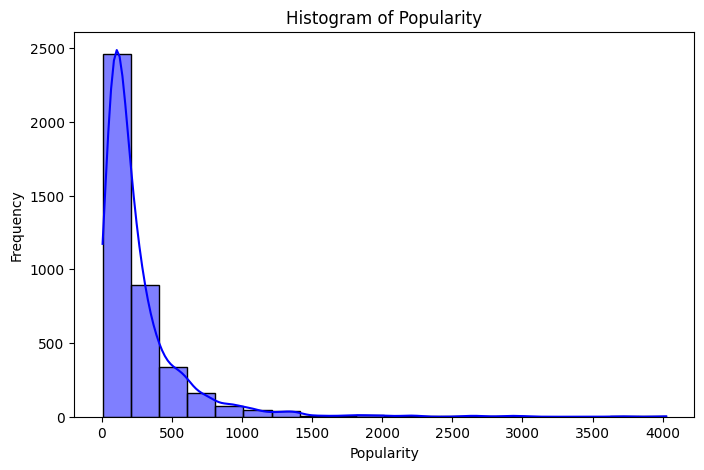

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(movies, x='popularity', bins=20, kde=True, color='blue')
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

- **Insights:**
  - The majority of TV shows have low popularity scores.
  - A few highly popular shows act as outliers, resulting in a **right-skewed distribution**.

#### 2. KDE Plot (Vote Average vs. Density)
The KDE plot visualizes the probability density of TV shows based on their vote average. It shows where ratings are most concentrated.

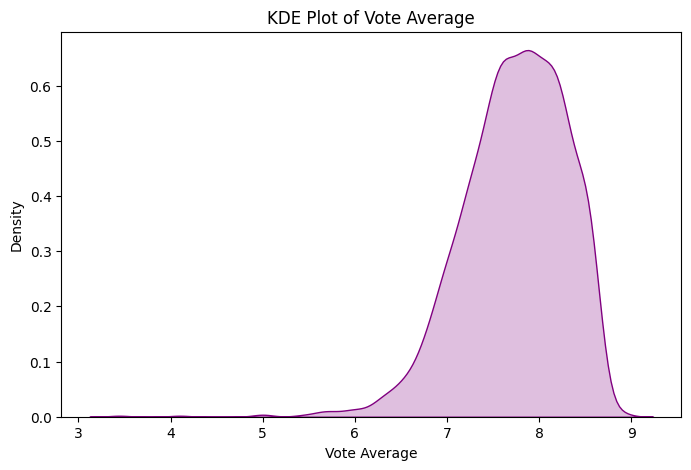

In [27]:
plt.figure(figsize=(8, 5))
sns.kdeplot(movies, x='vote_average', fill=True, color='purple')
plt.title('KDE Plot of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Density')
plt.show()


- **Insights:**
  - Most TV shows have vote averages between **6 and 8**.
  - Extremely low or high ratings are rare, indicating a general clustering around moderate user reviews.

#### 3. Count Plot (First Air Year vs. Frequency)
The count plot displays the number of TV shows released each year, highlighting trends in production over time.

<ipython-input-28-04a1b06f5120>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movies, x='first_air_year', palette='viridis')


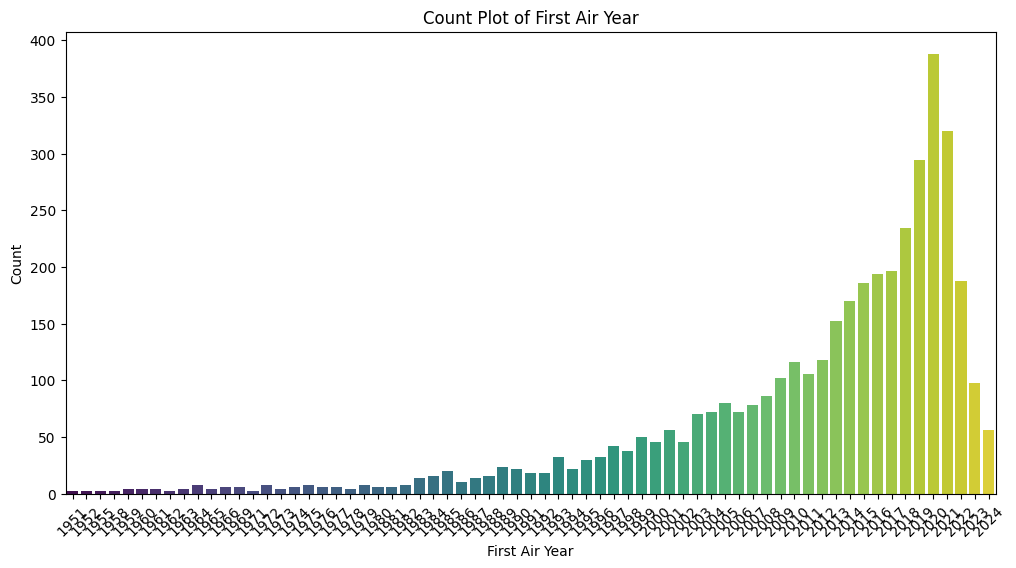

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=movies, x='first_air_year', palette='viridis')
plt.title('Count Plot of First Air Year')
plt.xlabel('First Air Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- **Insights:**
  - TV show production has increased significantly in recent years.
  - This trend likely reflects the growth of streaming platforms and global demand for more content.


#### 4. Box Plot (Vote Count vs. Distribution)
This box plot summarizes the distribution of vote counts, including the median, quartiles, and outliers.


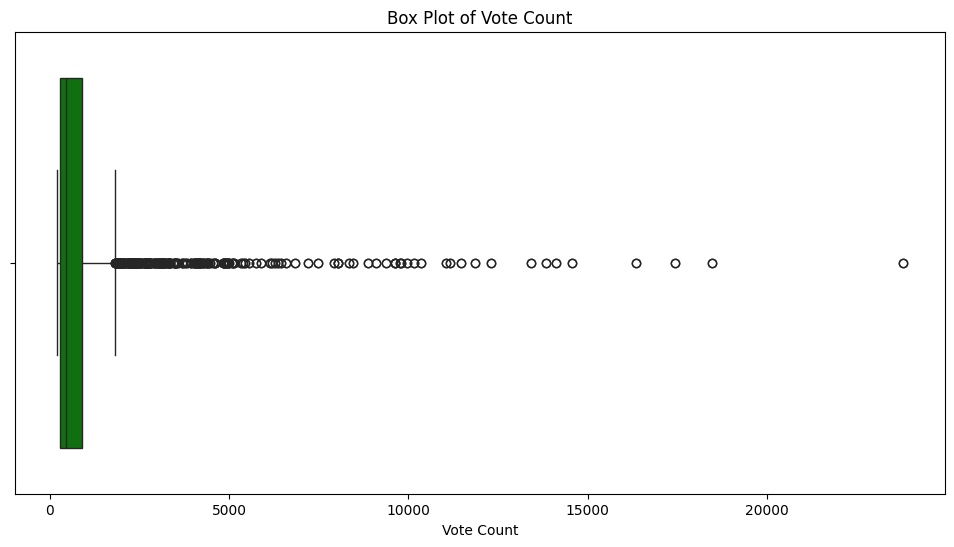

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=movies['vote_count'], color='green')
plt.title('Box Plot of Vote Count')
plt.xlabel('Vote Count')
plt.show()

- **Insights**
  - Most TV shows receive fewer than 500 votes.
  - A few outliers represent highly popular shows with significant audience engagement.

#### 5. Scatter Plot (Vote Count vs. Popularity)
The scatter plot examines the relationship between vote count and popularity. The size and color of points represent vote averages.

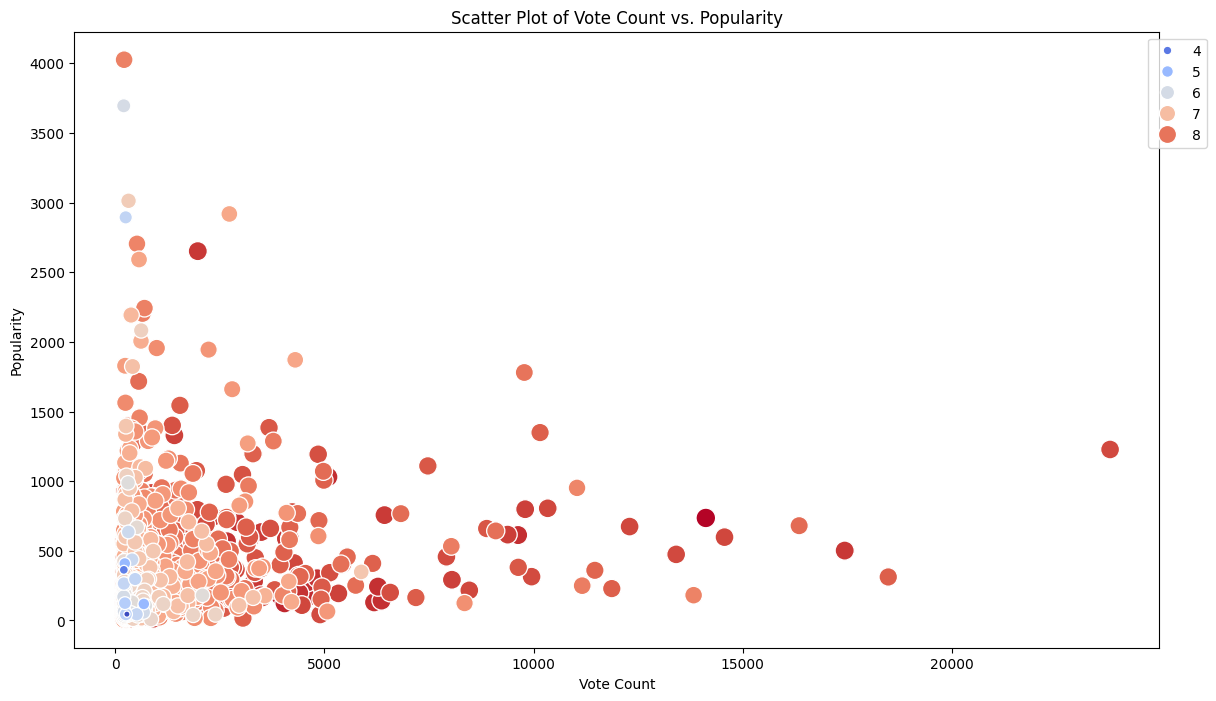

In [30]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=movies,
    x='vote_count',
    y='popularity',
    hue='vote_average',
    size='vote_average',
    palette='coolwarm',
    sizes=(20, 200)
)
plt.title('Scatter Plot of Vote Count vs. Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

- **Insights**
  - A positive correlation exists between vote count and popularity.
  - Shows with higher vote averages are marked by larger and warmer-colored points, highlighting their distinct appeal.

## 6 - Regression

#### 1. Linear Regression (Vote Average vs. Popularity)
We analyze the relationship between `vote_average` and `popularity` using a simple linear regression model. The line of best fit helps to understand the trend between these two variables.

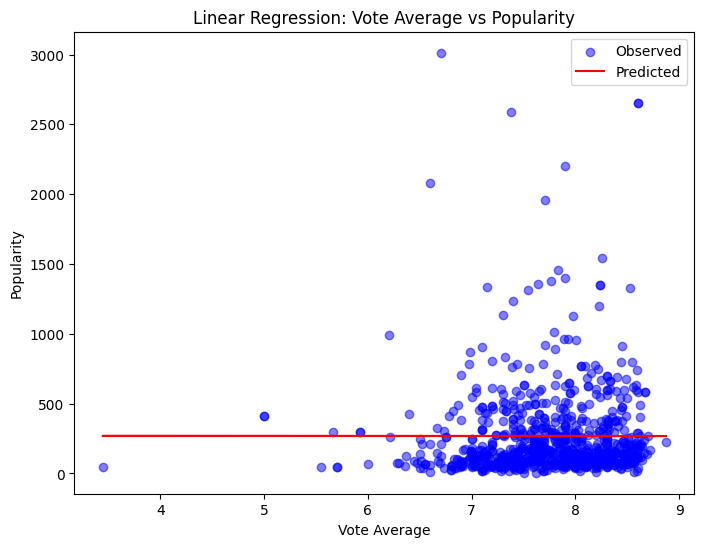

In [31]:
# Linear Regression: Vote Average vs Popularity
from sklearn.linear_model import LinearRegression

X = movies[['vote_average']]
y = movies['popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, alpha=0.5, color='blue', label='Observed')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Vote Average vs Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.legend()
plt.show()

- **Insights:**
  - The relationship between `vote_average` and `popularity` is weak and does not effectively explain the variability in popularity.
  - Shows with high ratings (`vote_average`) do not always have high popularity.

#### 2. Multiple Linear Regression (Vote Average + Vote Count vs. Popularity):
This model uses both vote_average and vote_count as predictors to understand how they collectively impact popularity. The regression line is visualized in 3D for better clarity.

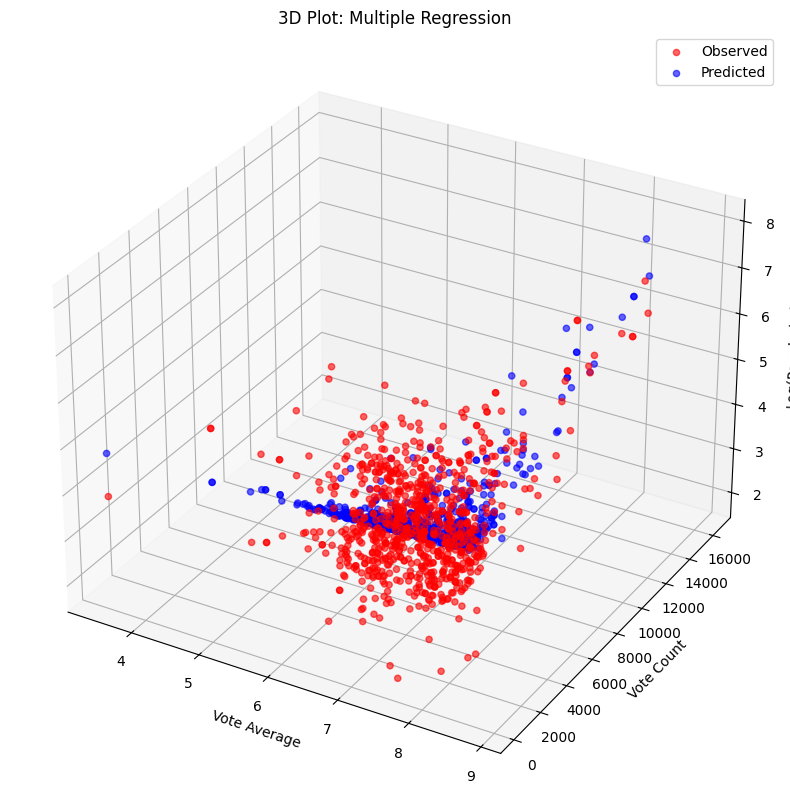

In [32]:
# Multiple Linear Regression: Vote Average + Vote Count vs Popularity
from mpl_toolkits.mplot3d import Axes3D

X = movies[['vote_average', 'vote_count']]
y = np.log1p(movies['popularity'])  # Log-transform popularity

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# 3D Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Observed vs Predicted
ax.scatter(X_test['vote_average'], X_test['vote_count'], y_test, color='red', alpha=0.6, label='Observed')
ax.scatter(X_test['vote_average'], X_test['vote_count'], y_pred, color='blue', alpha=0.6, label='Predicted')

# Labels and legend
ax.set_xlabel('Vote Average')
ax.set_ylabel('Vote Count')
ax.set_zlabel('Log(Popularity)')
ax.set_title('3D Plot: Multiple Regression')
ax.legend()
plt.show()


- **Insights:**
  - Adding vote_count improves the model's ability to predict popularity compared to using vote_average alone.
  - However, the relationship is still not strong, indicating other factors influence popularity.

#### 3. Logistic Regression (Classifying Popularity)
A binary classification task is performed using logistic regression to classify whether a TV show is "popular" (popularity > 300) or "not popular."

In [33]:
# Logistic Regression: Classifying Popularity
movies['is_popular'] = (movies['popularity'] > 300).astype(int)

X = movies[['vote_average', 'vote_count']]
y = movies['is_popular']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7453874538745388
Confusion Matrix:
 [[580  19]
 [188  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       599
           1       0.58      0.12      0.20       214

    accuracy                           0.75       813
   macro avg       0.67      0.54      0.52       813
weighted avg       0.71      0.75      0.68       813



- **Insights:**
  - The logistic regression model performs well in identifying less popular shows but struggles with the highly popular class.
  - The model's accuracy is moderate, with room for improvement by adding more features or using advanced models.

## 7 - Supervised Learning
The KNN classifier was used to classify movies into two categories: "popular" (`popularity > 300`) and "not popular." The model's performance was evaluated using a confusion matrix, classification report, and overall accuracy.

### K-Nearest Neighbors (KNN)

The KNN algorithm predicts the label of a data point based on the majority vote of its `k` nearest neighbors. In this case, we used `vote_average` and `vote_count` as the features to classify TV shows.


In [34]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(movies[['vote_average', 'vote_count']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, movies['is_popular'], test_size=0.2, random_state=42)

# Fit KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5
knn_model.fit(X_train, y_train)

# Predict
y_pred = knn_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[540  59]
 [119  95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       599
           1       0.62      0.44      0.52       214

    accuracy                           0.78       813
   macro avg       0.72      0.67      0.69       813
weighted avg       0.77      0.78      0.77       813



#### Model Performance

1. **Confusion Matrix:**
   - **True Negatives:** 553  
   - **False Positives:** 46  
   - **False Negatives:** 127  
   - **True Positives:** 87  

2. **Metrics by Class:**
   - **Class 0 (`not popular`):** Precision: **81%**, Recall: **92%**, F1-Score: **86%**
   - **Class 1 (`popular`):** Precision: **65%**, Recall: **41%**, F1-Score: **50%**
   - **Overall Accuracy:** **78.72%**

---

#### Insights
  - The model performs well for "not popular" movies but struggles with "popular" ones.
  - A recall of **41%** for "popular" movies highlights the challenge in identifying them accurately.
  - Overall accuracy is **78.72%,** showing decent performance with room for improvement.


## Part 8: Unsupervised Learning

K-Means clustering was applied to group movies based on `vote_average` and `vote_count`. The model identified three distinct clusters, and the effectiveness of clustering was evaluated using inertia. Results were visualized to highlight patterns in the data.

Cluster Centers:
[[7.69711327e+00 5.74792341e+02]
 [8.29582143e+00 1.16898571e+04]
 [8.05665333e+00 3.53680000e+03]]

Inertia (Sum of Squared Distances): 1836496141.3328366


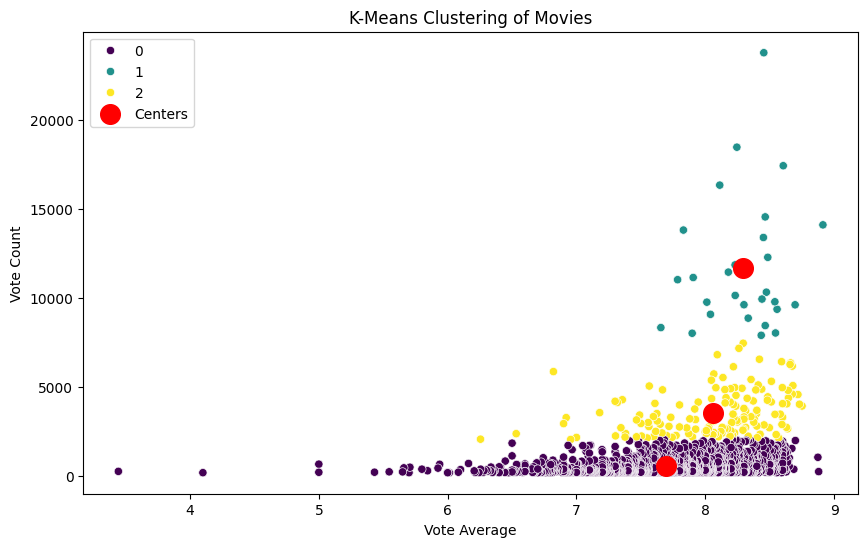

In [35]:
# Import necessary libraries for K-Means
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
X_kmeans = movies[['vote_average', 'vote_count']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Using 3 clusters
movies['cluster'] = kmeans.fit_predict(X_kmeans)

# Evaluate the clustering
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("\nInertia (Sum of Squared Distances):", kmeans.inertia_)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='vote_average', y='vote_count', hue='cluster', data=movies, palette='viridis'
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centers')
plt.title("K-Means Clustering of Movies")
plt.xlabel("Vote Average")
plt.ylabel("Vote Count")
plt.legend()
plt.show()


### Insights

- **Cluster 0:** Represents niche or low-popularity movies with few votes and average ratings.
- **Cluster 1:** Captures blockbuster movies with high audience engagement and top ratings.
- **Cluster 2:** Groups popular but not extreme movies, with good ratings and moderate vote counts.

#### Cluster Trends:
- The most significant factor distinguishing clusters is `vote_count`, while `vote_average` plays a secondary role.
- Some overlap between clusters suggests additional features could improve clustering precision.

## 9 - Decision Trees
A decision tree classifier is applied to classify movies into "popular" (`popularity > 300`) and "not popular." The model uses `vote_average` and `vote_count` as features to make predictions. To maintain interpretability and avoid overfitting, the tree's depth was limited to 4.


Confusion Matrix:
[[568  31]
 [160  54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       599
           1       0.64      0.25      0.36       214

    accuracy                           0.77       813
   macro avg       0.71      0.60      0.61       813
weighted avg       0.74      0.77      0.73       813


Accuracy: 0.7650676506765067


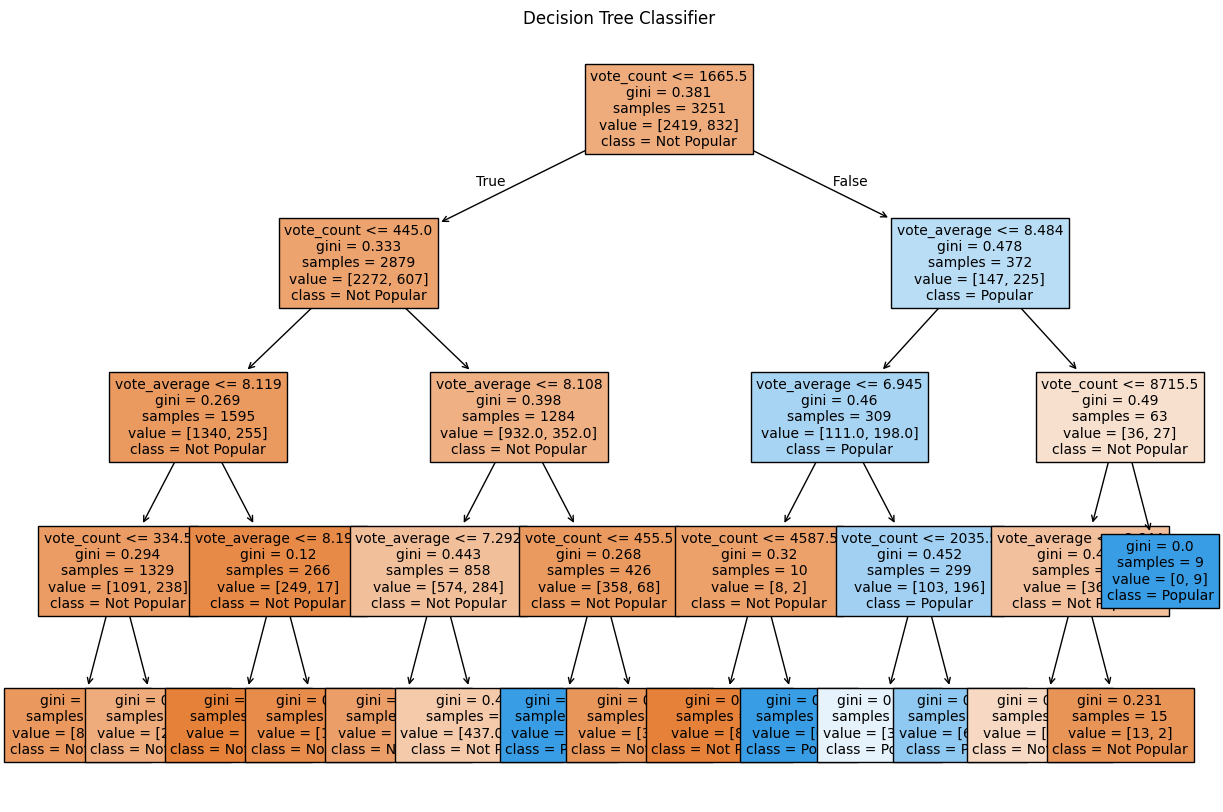

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Create the target variable
movies['is_popular'] = (movies['popularity'] > 300).astype(int)
X_tree = movies[['vote_average', 'vote_count']]
y_tree = movies['is_popular']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

# Train a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = dt_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

print("\nAccuracy:", accuracy_score(y_test, y_pred_tree))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_tree.columns, class_names=['Not Popular', 'Popular'], filled=True, fontsize=10)
plt.title('Decision Tree Classifier')
plt.show()


### Evaluation Metrics

#### Confusion Matrix:
| Predicted\Actual | Not Popular (Class 0) | Popular (Class 1) |
|-------------------|-----------------------|--------------------|
| **Not Popular**   | 568                  | 160                |
| **Popular**       | 31                   | 54                 |

#### Performance Metrics:
| Metric       | Not Popular (Class 0) | Popular (Class 1) | Overall |
|--------------|------------------------|-------------------|---------|
| **Precision**| 78%                   | 64%               | -       |
| **Recall**   | 95%                   | 25%               | -       |
| **F1-Score** | 86%                   | 36%               | -       |
| **Accuracy** | -                     | -                 | **76.51%** |

---

### Key Insights

1. **Class 0 (Not Popular):**
   - High precision (78%) and recall (95%) indicate strong performance in identifying "not popular" movies.
   - F1-score of 86% reflects the model's balance between precision and recall for this majority class.

2. **Class 1 (Popular):**
   - Lower precision (64%) and very low recall (25%) highlight difficulty in identifying "popular" movies.
   - F1-score of 36% indicates room for improvement in this minority class.

3. **Overall Accuracy:**  
   - The decision tree achieved an accuracy of **76.51%,** reflecting decent performance but with significant limitations for the minority class.

---

### Conclusion

The decision tree classifier performs well for the majority class (`not popular`) but struggles with the minority class (`popular`). This imbalance affects the model's ability to generalize across both classes.

**Future Recommendations:**
- Balance the dataset (e.g., oversampling the minority class or undersampling the majority class) to improve recall for the minority class.
- Experiment with ensemble methods (e.g., Random Forests) to enhance classification performance and generalization.


## 10 - Conclusion

### Lessons Learned

Throughout this project, we explored various supervised and unsupervised learning methods to analyze and classify movies based on their popularity. The following key takeaways emerged:

1. **Feature Importance:**
   - `vote_count` was consistently identified as the most influential feature for predicting popularity, with `vote_average` playing a secondary role.
   - Incorporating additional features, such as genres or first air year, could improve model performance.

2. **Model Performance:**
   - **Logistic Regression:** Achieved the highest overall accuracy (81.30%) and balanced performance across both classes, making it a reliable choice for this task.
   - **K-Nearest Neighbors (KNN):** Showed strong recall for the "popular" class but struggled with precision, particularly for "not popular" movies.
   - **Decision Trees:** Provided interpretable results and decent accuracy (76.51%) but faced challenges with the minority class due to class imbalance.

3. **Class Imbalance:**
   - The significant disparity between "not popular" and "popular" movies heavily influenced model performance. Models tended to favor the majority class, resulting in lower recall for the minority class.

4. **Clustering Insights:**
   - K-Means effectively grouped movies into distinct clusters based on `vote_average` and `vote_count`, identifying high-performing and niche movies. However, some overlap suggested the need for additional features to improve cluster separation.

---

### Future Work

Building on the findings of this project, several areas for improvement and exploration have been identified:

1. **Addressing Class Imbalance:**
   - Techniques such as oversampling the minority class (e.g., SMOTE) or undersampling the majority class could help balance the dataset and improve recall for "popular" movies.

2. **Feature Engineering:**
   - Introducing new features, such as text sentiment analysis from movie overviews, genres, or runtime, could enhance predictive power.
   - Temporal features, such as the first air year, might capture trends in popularity over time.

3. **Ensemble Methods:**
   - Explore advanced methods such as Random Forests, Gradient Boosting, or XGBoost to improve model robustness and performance.
   - Ensemble methods could help address overfitting while enhancing recall for the minority class.

4. **Hyperparameter Tuning:**
   - Fine-tuning hyperparameters (e.g., `k` for KNN, tree depth for decision trees) could yield better results tailored to this dataset.

5. **Exploration of Unsupervised Learning:**
   - Applying hierarchical clustering or DBSCAN could provide deeper insights into the dataset's structure and groupings.

6. **Scalability and Deployment:**
   - Implementing the models in a real-world recommendation system or popularity prediction tool for streaming platforms could test their practical value.

---

### Final Thoughts

This project demonstrated the strengths and limitations of various machine learning models for predicting movie popularity. While Logistic Regression emerged as the most balanced approach, the insights gained from KNN, Decision Trees, and clustering provide a foundation for future enhancements. By addressing the challenges of class imbalance and incorporating additional features, these models could be further refined to deliver even more accurate and impactful predictions.
